WELCOME TO PROJECT!

**TEAM MEMBERS:**


*  
  Donifa Babu B M -19IT026
* 
  Eshwaran A B R - 19IT122



Here is our Data Analytics project on Student Performance Analysis...


In [ ]:
#In above snippet, we have imported necessary libraries 
import numpy as np  #For handling numeric
import pandas as pd  #For handling data
import matplotlib.pyplot as plt #For visualisation 
import seaborn as sb

In [ ]:
#Upload file from colab folder to work environment
df = pd.read_csv('StudentsPerformance.csv')  #read_csv makes it available 

In [ ]:
#To know number of rows and columns
df.shape   #Gives (rows,columns)

(1000, 8)

In [ ]:
#Gives complete detail of dataset
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [ ]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
636,female,group B,high school,free/reduced,completed,67,80,81
412,male,group D,associate's degree,standard,none,71,66,60
416,male,group C,bachelor's degree,standard,completed,71,74,68
589,female,group A,some high school,standard,none,48,66,65
650,male,group C,some high school,free/reduced,completed,51,56,53


In [ ]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.tail()
#The above three functions display few records from the dataset


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
#Since the column names are large and with spaces, we shall rename as follows 
df.columns = ['gender', 'race', 'parentDegree', 'lunch', 'course', 'mathScore', 'readingScore', 'writingScore'] 

In [ ]:
#Now if we display dataset
df.sample()

,gender,race,parentDegree,lunch,course,mathScore,readingScore,writingScore
326,male,group C,some college,standard,none,61,61,62


**PREPROCESSING STAGE:**

In [ ]:
#To check if there is any null values
df.isna()

,gender,race,parentDegree,lunch,course,mathScore,readingScore,writingScore
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [ ]:
#To give count of null values
df.isna().sum()

gender          0
race            0
parentDegree    0
lunch           0
course          0
mathScore       0
readingScore    0
writingScore    0
dtype: int64

In [ ]:
#Inorder to go with easier visualisation, We add a extra column 'TotalScore' which is sum of Math, reading,writing scores
df['TotalScore']=df['mathScore']+df['readingScore']+df['writingScore']
df.sample()


,gender,race,parentDegree,lunch,course,mathScore,readingScore,writingScore,TotalScore
267,female,group D,high school,standard,none,69,72,77,218


In [ ]:
df.describe()

,mathScore,readingScore,writingScore,TotalScore
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


**BOXPLOT:**

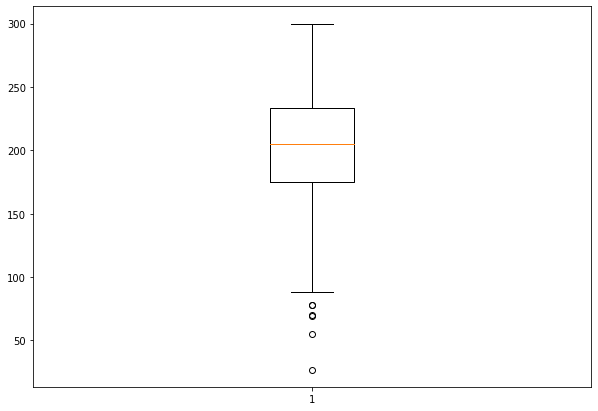

In [ ]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df['TotalScore'])
 
# show plot
plt.show()

In [ ]:
#InterQuartile Range IQR
Q1 = np.percentile(df['TotalScore'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['TotalScore'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

58.0


New Shape after Outlier removal:  (993, 9)


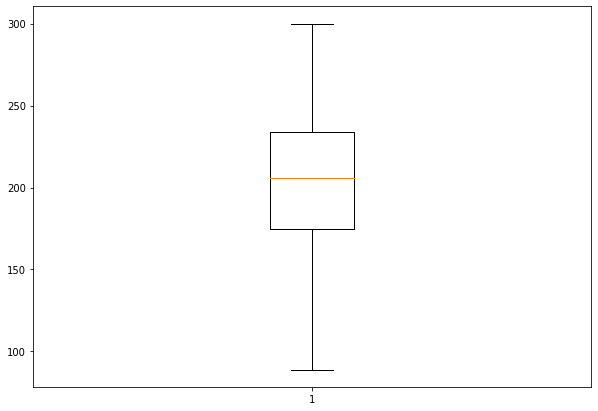

In [ ]:
#Inorder to remove the outlier data
#Upper bound
upper = np.where(df['TotalScore'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['TotalScore'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape after Outlier removal: ", df.shape)

#After outlier removal, Boxplot be like...

fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['TotalScore'])
plt.show()

**DATA VISUALIZATION:**

In [ ]:
df['race'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

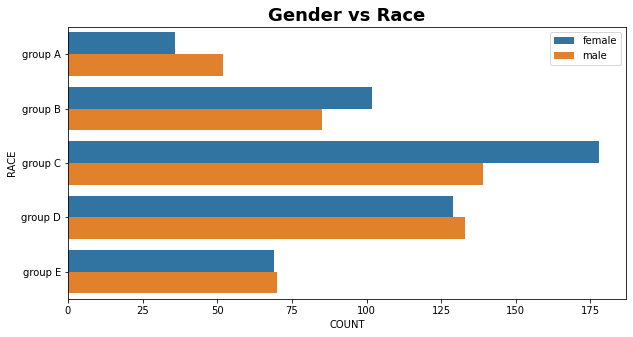

In [ ]:
plt.figure(figsize=(10,5))
ax = sb.countplot(y="race", hue="gender", data=df, order=["group A","group B","group C","group D","group E"])
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs Race', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='RACE')
plt.show()

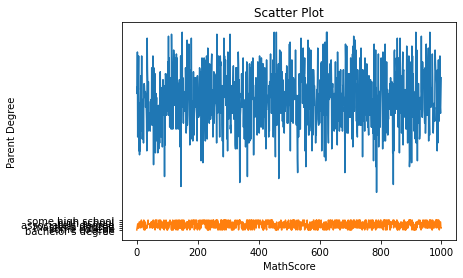

In [ ]:
# Scatter plot 
plt.plot(df['mathScore'])
plt.plot(df['parentDegree'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('MathScore')
plt.ylabel('Parent Degree')
  
plt.show()

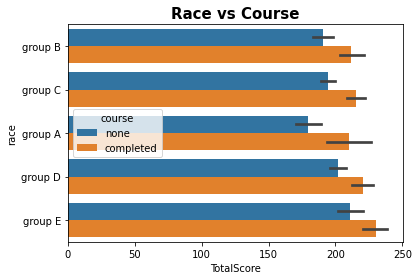

In [ ]:
sb.barplot(data=df, x="TotalScore",y="race",hue='course')
plt.title('Race vs Course',fontsize=15, fontweight='bold')

plt.show()

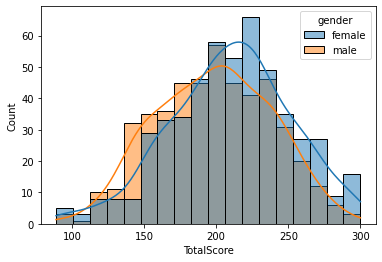

In [ ]:
sb.histplot(x='TotalScore', data=df, kde=True, hue='gender')
  
plt.show()

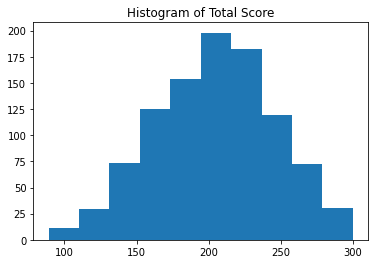

In [ ]:
plt.hist(df['TotalScore'])
  
plt.title("Histogram of Total Score")
  
# Adding the legends
plt.show()

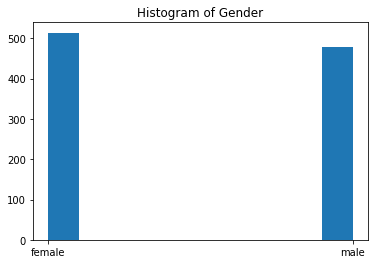

In [ ]:
plt.hist(df['gender'])
  
plt.title("Histogram of Gender")

plt.show()

In [ ]:
#Who excel in Maths? Male or female

import plotly.express as px

fig = px.line(df, y='mathScore', color='gender')
  
# showing the plot
fig.show()

In [ ]:
#Who excel in Reading? Male or female

import plotly.express as px

fig = px.line(df, y='readingScore', color='gender')
  
# showing the plot
fig.show()

In [ ]:
#Who excel in Overall? Male or female

import plotly.express as px

fig = px.line(df, y='TotalScore', color='gender')
  
# showing the plot
fig.show()

**PREDICTION:**

In [ ]:
#Convert Categorical to numeric values using encoding
#List all categorical columns and values

print("Gender : ",df['gender'].unique())
print("Race : " ,df['race'].unique())
print("Parent Degree : ",df['parentDegree'].unique())
print("Lunch : ", df['lunch'].unique())
print("Course : ",df['course'].unique())

Gender :  ['female' 'male']
Race :  ['group B' 'group C' 'group A' 'group D' 'group E']
Parent Degree :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Lunch :  ['standard' 'free/reduced']
Course :  ['none' 'completed']


In [ ]:
#Label Encoding
en_data=df
en_data['gender'].replace(['male','female'],
                        [0,1], inplace=True)
en_data['lunch'].replace(['standard','free/reduced'],
                        [0,1], inplace=True)
en_data['course'].replace(['none','completed'],
                        [0,1], inplace=True)
en_data['race'].replace(['group A','group B','group C','group D','group E'],
                        [0, 1,2,3,4], inplace=True)
en_data['parentDegree'].replace(["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school'],
                        [0, 1,2,3,4,5], inplace=True)
print(en_data.head())


   gender  race  parentDegree  lunch  course  mathScore  readingScore  \
0       1     1             0      0       0         72            72   
1       1     2             1      0       1         69            90   
2       1     1             2      0       0         90            95   
3       0     0             3      1       0         47            57   
4       0     2             1      0       0         76            78   

   writingScore  TotalScore  
0            74         218  
1            88         247  
2            93         278  
3            44         148  
4            75         229  


In [ ]:
#Now data has been converted from categorical to numeric


In [ ]:
#Lets move for prediction - based on algorithm

In [ ]:
Y = en_data['TotalScore']
X = en_data[['gender','race','mathScore','readingScore','writingScore']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
Ks = 10
for i in range(1,Ks):
  k = i
  neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train)
  yhat = neigh.predict(X_test)
  score = accuracy_score(Y_test,yhat)
  print('K: ', k, ' score: ', score, '\n')

K:  1  score:  0.1708542713567839 

K:  2  score:  0.1407035175879397 

K:  3  score:  0.09045226130653267 

K:  4  score:  0.06532663316582915 

K:  5  score:  0.06030150753768844 

K:  6  score:  0.06030150753768844 

K:  7  score:  0.06532663316582915 

K:  8  score:  0.06532663316582915 

K:  9  score:  0.07537688442211055 



KNN(K Nearest Neighbour) Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#From previous Iteration we conclude the optimal neighbour size as 3 or 9
knn = KNeighborsClassifier(n_neighbors=9)
 
knn.fit(X_train, Y_train)

 # Predicting the Test set results
Y_pred = knn.predict(X_test)

print(knn.predict(X_test))


[207 247 261 237 147 229 204 195 259 219 204 239 167 155 215 244 232 241
 155 223 196 269 252 207  89 201 258 215 225 232 226 205 261 259 247 300
 219 266 207 239 162 176 161 223 204 145 248 155 164 130 237 204 287 213
 214 227 225 134 139 227 153 251 193 168 191 145 206 234 191 144 252 259
 232 259 215 160 232 252 180 232 189 112 206 217 198 207 300 216 196 204
 155 223 132 168 261 218 215 169 239 267  97 208 205 225 214 139 218 205
 145 265 232 139 232 207 182 300 267 196 160 254 132 232 252 194 199 218
 196 168 206 139 247 191 186 175 259 215 244 259 227 145 203 261 158 229
 164 207 297 182 196  95 207 259 217 192 207 184 151 275 184 259 268 151
 261 257 115 215 278 227 138 206 239 173 193 229 222 219 235 255 156 255
 203 256 187 234 154 232  93 265 192 180 218 161 168 207 117 214 151 235
 130]


KNN(K Nearest Neighbour) Accuracy

In [ ]:

# Making the Accuracy of KNN
from sklearn.metrics import  accuracy_score
print(accuracy_score(Y_test, Y_pred))

print("Current accuracy is {}%".format(accuracy_score(Y_test, Y_pred)*100))


0.07537688442211055
Current accuracy is 7.537688442211055%


Multiple Regresion Algorithm

In [ ]:
#Multiple Regression
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,Y_train)

LinearRegression()

In [ ]:

#predict the Result
Y_Pred2 = LR.predict([[0,0,72,72,85]])

print(Y_Pred2)

[229.]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Multiple Regression Accuracy

In [ ]:
import sklearn.metrics as sm
Y_Pred3 = LR.predict(X_test)
print(Y_Pred3)
rerror=sm.r2_score(Y_test, Y_Pred3)
print("R Square Error of regression : ",rerror)


[212. 254. 273. 232. 150. 230. 210. 193. 261. 217. 208. 238. 170. 158.
 218. 244. 231. 246. 154. 226. 197. 275. 256. 211.  94. 201. 257. 216.
 227. 238. 224. 206. 274. 260. 250. 293. 225. 264. 205. 244. 165. 178.
 167. 226. 204. 143. 247. 154. 168. 116. 241. 201. 282. 216. 220. 228.
 227. 136. 129. 225. 153. 249. 197. 166. 193. 145. 209. 237. 194. 157.
 257. 261. 234. 264. 215. 164. 234. 253. 181. 236. 191. 122. 210. 218.
 194. 209. 289. 216. 196. 203. 155. 224. 127. 171. 267. 220. 213. 166.
 238. 275. 117. 212. 198. 230. 214. 138. 219. 208. 139. 268. 238. 144.
 236. 208. 179. 296. 282. 198. 165. 254. 140. 235. 249. 198. 200. 217.
 198. 173. 204. 140. 252. 189. 191. 176. 262. 219. 247. 262. 221. 148.
 204. 267. 162. 232. 166. 205. 290. 186. 192. 113. 205. 266. 220. 191.
 207. 185. 155. 271. 191. 261. 270. 147. 275. 258. 120. 218. 282. 228.
 141. 204. 242. 177. 198. 228. 223. 220. 235. 260. 159. 257. 203. 258.
 192. 238. 157. 235. 104. 262. 194. 184. 221. 161. 170. 204. 129. 202.
 155. 

An R2 of 1.0 indicates that the data perfectly fit the linear model.

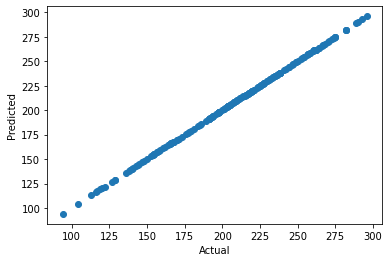

In [ ]:
plt.scatter(Y_test,Y_Pred3);
plt.xlabel('Actual');
plt.ylabel('Predicted');

Thus, the Exploratory Analysis on Dataset and its results are presented.

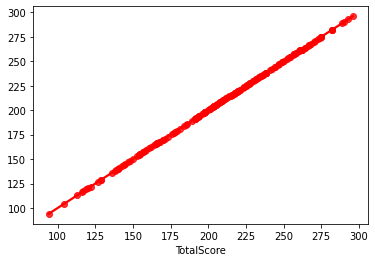

In [ ]:
sb.regplot(x=Y_test,y=Y_Pred3,ci=None,color ='red');

STREAMLIT FOR WEB APP

In [ ]:
import joblib
joblib.dump(LR,'studentPerf_model.pkl')

['studentPerf_model.pkl']

In [ ]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('studentPerf_model.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
@st.cache()
  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(ReadScore,WriteScore,MathScore):   
 
    # Pre-processing user input    
    
 
    # Making predictions 
    prediction = classifier.predict( 
        [[ReadScore,WriteScore,MathScore]])
     
    return Prediction
      
  
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Streamlit Loan Prediction ML App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    ReadScore = st.number_input("Reading Score") 
    WriteScore = st.number_input("Writing Score Score") 
    MathScore = st.number_input("Maths Score")
    
    result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(ReadScore,WriteScore,MathScore) 
        st.success('Your total score is {}'.format(result))
        
     
if __name__=='__main__': 
    main()